In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.impute import SimpleImputer

In [2]:
# Read in data

BP=pd.read_csv('data/con_var/BP.csv')
Tmp=pd.read_csv('data/con_var/TEM.csv')
RH=pd.read_csv('data/con_var/RH.csv')

In [3]:
BP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Site                     52560 non-null  object 
 1   Species                  52560 non-null  object 
 2   ReadingDateTime          52560 non-null  object 
 3   Value                    34287 non-null  float64
 4   Units                    52560 non-null  object 
 5   Provisional or Ratified  52560 non-null  object 
dtypes: float64(1), object(5)
memory usage: 2.4+ MB


In [4]:
Tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Site                     52560 non-null  object 
 1   Species                  52560 non-null  object 
 2   ReadingDateTime          52560 non-null  object 
 3   Value                    49340 non-null  float64
 4   Units                    52560 non-null  object 
 5   Provisional or Ratified  52560 non-null  object 
dtypes: float64(1), object(5)
memory usage: 2.4+ MB


In [5]:
RH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52560 entries, 0 to 52559
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Site                     52560 non-null  object 
 1   Species                  52560 non-null  object 
 2   ReadingDateTime          52560 non-null  object 
 3   Value                    24252 non-null  float64
 4   Units                    52560 non-null  object 
 5   Provisional or Ratified  52560 non-null  object 
dtypes: float64(1), object(5)
memory usage: 2.4+ MB


In [6]:
def trans(df):
    new_df=pd.DataFrame(df.loc[:8759,'ReadingDateTime'])
    for site in df['Site'].unique():
        new_df[site]=df[df['Site']==site].Value.values
    return new_df

In [7]:
BP=trans(BP)
BP.describe()

,BG1,CD1,GR4,GB6,HK6,RG3
count,8545.000000,8640.000000,0.0,0.0,8525.000000,8577.000000
mean,1009.576829,1007.237153,NaN,NaN,1003.239883,1011.351638
std,12.519591,11.737971,NaN,NaN,12.753954,11.997753
min,965.000000,965.000000,NaN,NaN,958.000000,969.000000
25%,1002.000000,1000.000000,NaN,NaN,995.000000,1004.000000
50%,1010.000000,1008.000000,NaN,NaN,1003.000000,1012.000000
75%,1018.000000,1015.000000,NaN,NaN,1013.000000,1019.000000
max,1038.000000,1036.000000,NaN,NaN,1037.000000,1040.000000


In [8]:
BP.drop(['GR4','GB6'],axis=1,inplace=True)

<AxesSubplot:xlabel='ReadingDateTime'>

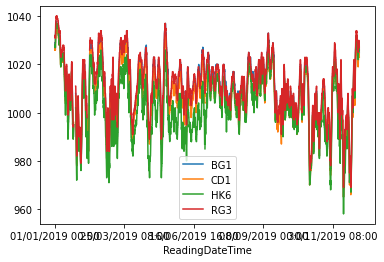

In [9]:
BP.plot(x='ReadingDateTime')

In [10]:
Tmp=trans(Tmp)
Tmp.describe()

,BG1,BQ7,RG1,RG3,HK6,RI2
count,8372.000000,8525.000000,7455.000000,8394.000000,8123.000000,8471.000000
mean,13.301839,12.285982,11.912274,11.033238,12.884033,12.584347
std,6.088114,6.266272,5.946373,6.002896,11.312809,6.447605
min,-3.000000,-6.000000,-14.000000,-7.000000,-239.000000,-4.000000
25%,9.000000,8.000000,8.000000,7.000000,9.000000,8.000000
50%,13.000000,12.000000,11.000000,10.000000,12.000000,12.000000
75%,18.000000,17.000000,16.000000,15.000000,17.000000,17.000000
max,38.000000,36.000000,35.000000,34.000000,39.000000,38.000000


The minimum value of **HK6** is very abnormal

<AxesSubplot:xlabel='ReadingDateTime'>

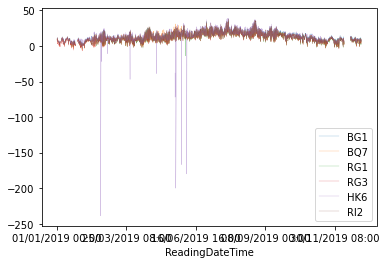

In [11]:
Tmp.plot(x='ReadingDateTime',linewidth=0.2)

In [12]:
Tmp.sort_values(by='HK6',ascending=True).head(50)

,ReadingDateTime,BG1,BQ7,RG1,RG3,HK6,RI2
1262,22/02/2019 14:00,16.0,14.0,16.0,14.0,-239.0,17.0
1263,22/02/2019 15:00,16.0,14.0,15.0,15.0,-214.0,18.0
3423,23/05/2019 15:00,NaN,26.0,22.0,21.0,-200.0,26.0
1264,22/02/2019 16:00,14.0,12.0,13.0,13.0,-185.0,16.0
3424,23/05/2019 16:00,NaN,25.0,22.0,21.0,-184.0,26.0
3738,05/06/2019 18:00,17.0,16.0,14.0,14.0,-180.0,NaN
3425,23/05/2019 17:00,NaN,23.0,20.0,19.0,-174.0,24.0
3737,05/06/2019 17:00,18.0,17.0,15.0,15.0,-173.0,NaN
3590,30/05/2019 14:00,24.0,24.0,21.0,21.0,-167.0,24.0
3426,23/05/2019 18:00,NaN,21.0,18.0,18.0,-161.0,23.0


The values of HK6 seems to be very different from other sites, so the data might be problematic and hence removing it would be the best for the result.

In [13]:
Tmp.drop('HK6',axis=1,inplace=True)

<AxesSubplot:xlabel='ReadingDateTime'>

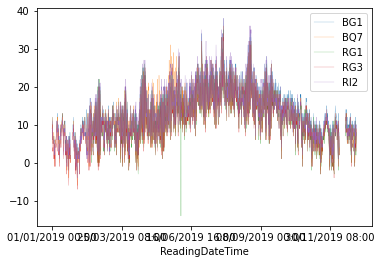

In [14]:
Tmp.plot(x='ReadingDateTime',linewidth=0.2)

In [15]:
Tmp[Tmp['RG1']< -10]

,ReadingDateTime,BG1,BQ7,RG1,RG3,RI2
3711,04/06/2019 15:00,17.0,16.0,-14.0,15.0,15.0


In [16]:
Tmp.loc[3711,'RG1']=np.nan

<AxesSubplot:xlabel='ReadingDateTime'>

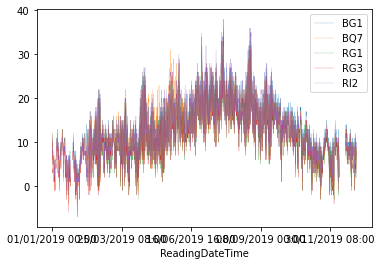

In [17]:
Tmp.plot(x='ReadingDateTime',linewidth=0.2)

In [18]:
RH=trans(RH)
RH.describe()

,BG1,BQ7,GR4,HK6,RG1,RG3
count,4.000000,8701.000000,0.0,2.00000,6968.000000,8577.000000
mean,-10.500000,78.968509,NaN,44.50000,76.727755,79.103882
std,63.799164,18.806313,NaN,17.67767,17.939313,15.693523
min,-103.000000,23.000000,NaN,32.00000,22.000000,25.000000
25%,-22.000000,65.000000,NaN,38.25000,65.000000,70.000000
50%,9.000000,82.000000,NaN,44.50000,81.000000,84.000000
75%,20.500000,98.000000,NaN,50.75000,92.000000,92.000000
max,43.000000,100.000000,NaN,57.00000,99.000000,99.000000


In [19]:
RH.drop(['BG1','GR4','HK6'],axis=1,inplace=True)

<AxesSubplot:xlabel='ReadingDateTime'>

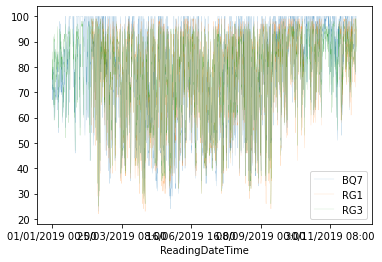

In [20]:
RH.plot(x='ReadingDateTime',linewidth=0.1)

In [21]:
imp=SimpleImputer(missing_values=np.nan,strategy='mean')
bp_imp=imp.fit_transform(BP.drop('ReadingDateTime',axis=1).values)
tmp_imp=imp.fit_transform(Tmp.drop('ReadingDateTime',axis=1).values)
rh_imp=imp.fit_transform(RH.drop('ReadingDateTime',axis=1).values)

In [22]:
BP[BP.columns[1:]]=bp_imp
Tmp[Tmp.columns[1:]]=tmp_imp
RH[RH.columns[1:]]=rh_imp

In [23]:
BP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ReadingDateTime  8760 non-null   object 
 1   BG1              8760 non-null   float64
 2   CD1              8760 non-null   float64
 3   HK6              8760 non-null   float64
 4   RG3              8760 non-null   float64
dtypes: float64(4), object(1)
memory usage: 342.3+ KB


In [24]:
Tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ReadingDateTime  8760 non-null   object 
 1   BG1              8760 non-null   float64
 2   BQ7              8760 non-null   float64
 3   RG1              8760 non-null   float64
 4   RG3              8760 non-null   float64
 5   RI2              8760 non-null   float64
dtypes: float64(5), object(1)
memory usage: 410.8+ KB


In [25]:
RH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ReadingDateTime  8760 non-null   object 
 1   BQ7              8760 non-null   float64
 2   RG1              8760 non-null   float64
 3   RG3              8760 non-null   float64
dtypes: float64(3), object(1)
memory usage: 273.9+ KB


In [37]:
cond=pd.DataFrame(BP['ReadingDateTime'])
cond['bp_mean']=np.mean(bp_imp,axis=1)
cond['tmp_mean']=np.mean(tmp_imp,axis=1)
cond['rh_mean']=np.mean(rh_imp,axis=1)

In [39]:
cond.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ReadingDateTime  8760 non-null   object 
 1   bp_mean          8760 non-null   float64
 2   tmp_mean         8760 non-null   float64
 3   rh_mean          8760 non-null   float64
dtypes: float64(3), object(1)
memory usage: 273.9+ KB


In [40]:
cond.to_csv('data/cond_hourly.csv',index=False)

In [41]:
cond['DateTime']=pd.to_datetime(cond['ReadingDateTime'])

In [42]:
df=cond.groupby(pd.Grouper(key='DateTime',freq='1D')).mean()

In [43]:
df.to_csv('data/cond_daily.csv',index=False)